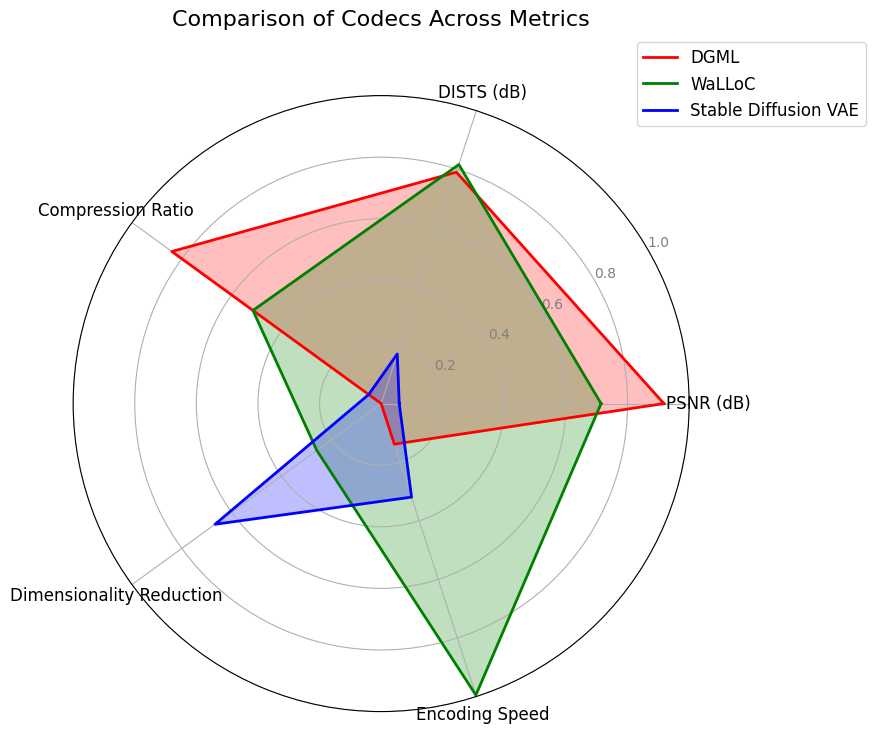

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Codec names
codecs = ['DGML', 'WaLLoC', 'Stable Diffusion VAE']

# Metrics and their values
metrics = ['PSNR (dB)', 'DISTS (dB)', 'Compression Ratio', 'Dimensionality Reduction', 'Encoding Speed']

# Original data
# PSNR values in decibels (dB)
PSNR = [33.77, 30.71, 20.88]

# DISTS values in decibels (dB) - higher is better
DISTS = [16.95, 17.08, 13.846]

# Compression Ratio
CR = [21.8, 15.29, 6]

# Dimensionality Reduction
DR = [4, 7.1, 12]

# Encoding Time in seconds per megapixel (we'll convert this to Encoding Speed)
Encoding_Time = [5.176, 0.0788, 4.1]  # Lower is better before inversion

# Combine the data into a single structure
data_raw = [PSNR, DISTS, CR, DR, Encoding_Time]
data = np.array(data_raw)

# Set predefined bounds for normalization (min_value, max_value)
metric_bounds = {
    'PSNR (dB)': (20, 35),                # Typical range for PSNR
    'DISTS (dB)': (13, 18),               # Based on observed DISTS values
    'Compression Ratio': (5, 25),         # Reasonable range for compression ratios
    'Dimensionality Reduction': (4, 16),  # Expected range for dimensionality reduction
    'Encoding Speed': (0.05, 6)           # Encoding Time range, inverted for Encoding Speed
}

# Metrics where lower original values are better (before inversion)
invert_metrics = ['Encoding Speed']  # Only Encoding Speed needs inversion

# Normalize the data based on predefined bounds
data_normalized = []
for i, metric in enumerate(metrics):
    min_val, max_val = metric_bounds[metric]
    values = data[i]
    # Clip values to the bounds to handle any outliers
    values = np.clip(values, min_val, max_val)
    # Normalize between 0 and 1
    normalized = (values - min_val) / (max_val - min_val)
    if metric in invert_metrics:
        # Invert the normalized values for metrics where lower original values are better
        normalized = 1 - normalized
    data_normalized.append(normalized)

data_normalized = np.array(data_normalized)

# Number of variables we're plotting
num_vars = len(metrics)

# Split the circle into even parts and save the angles
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Complete the loop

# Set up the radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Draw one axis per variable and add labels
plt.xticks(angles[:-1], metrics, color='black', size=12)

# Draw y-labels
ax.set_rlabel_position(30)
plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], color="grey", size=10)
plt.ylim(0, 1)

# Plot each codec's data
colors = ['r', 'g', 'b']
for idx, codec in enumerate(codecs):
    values = data_normalized[:, idx].tolist()
    values += values[:1]  # Complete the loop
    ax.plot(angles, values, color=colors[idx], linewidth=2, label=codec)
    ax.fill(angles, values, color=colors[idx], alpha=0.25)

# Add a title and legend
plt.title('Comparison of Codecs Across Metrics', size=16, y=1.1)
legend = plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1), fontsize='large')

# Show gridlines
ax.grid(True)

# Display the plot
plt.show()
